## Import 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Read in data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/titanic.csv")

print('Keys: ', df.keys())

# More info:
df.head(n=5)

Keys:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


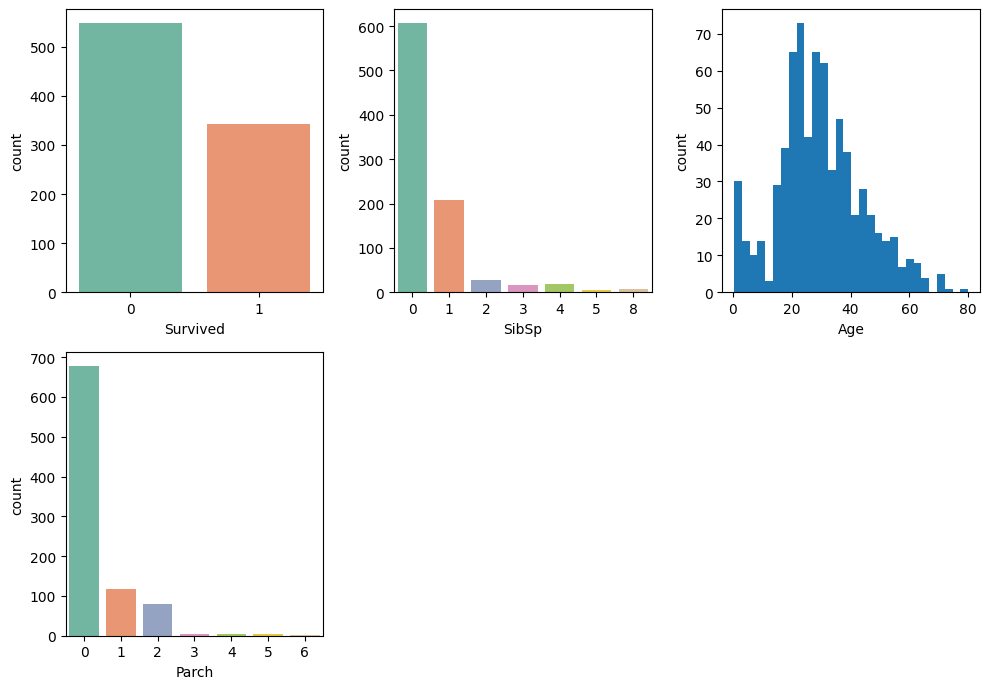

In [3]:
f = plt.figure(figsize=(10, 10))

plt.subplot(3,3,1)
sns.countplot(x="Survived", data=df, palette="Set2")

plt.subplot(3,3,2)
sns.countplot(x="SibSp", data=df, palette="Set2")

plt.subplot(3,3,3)
plt.hist(df.Age,bins=30,label='Age')
plt.xlabel('Age')
plt.ylabel('count')

plt.subplot(3,3,4)
sns.countplot(x="Parch", data=df, palette="Set2")


plt.tight_layout()
plt.show()

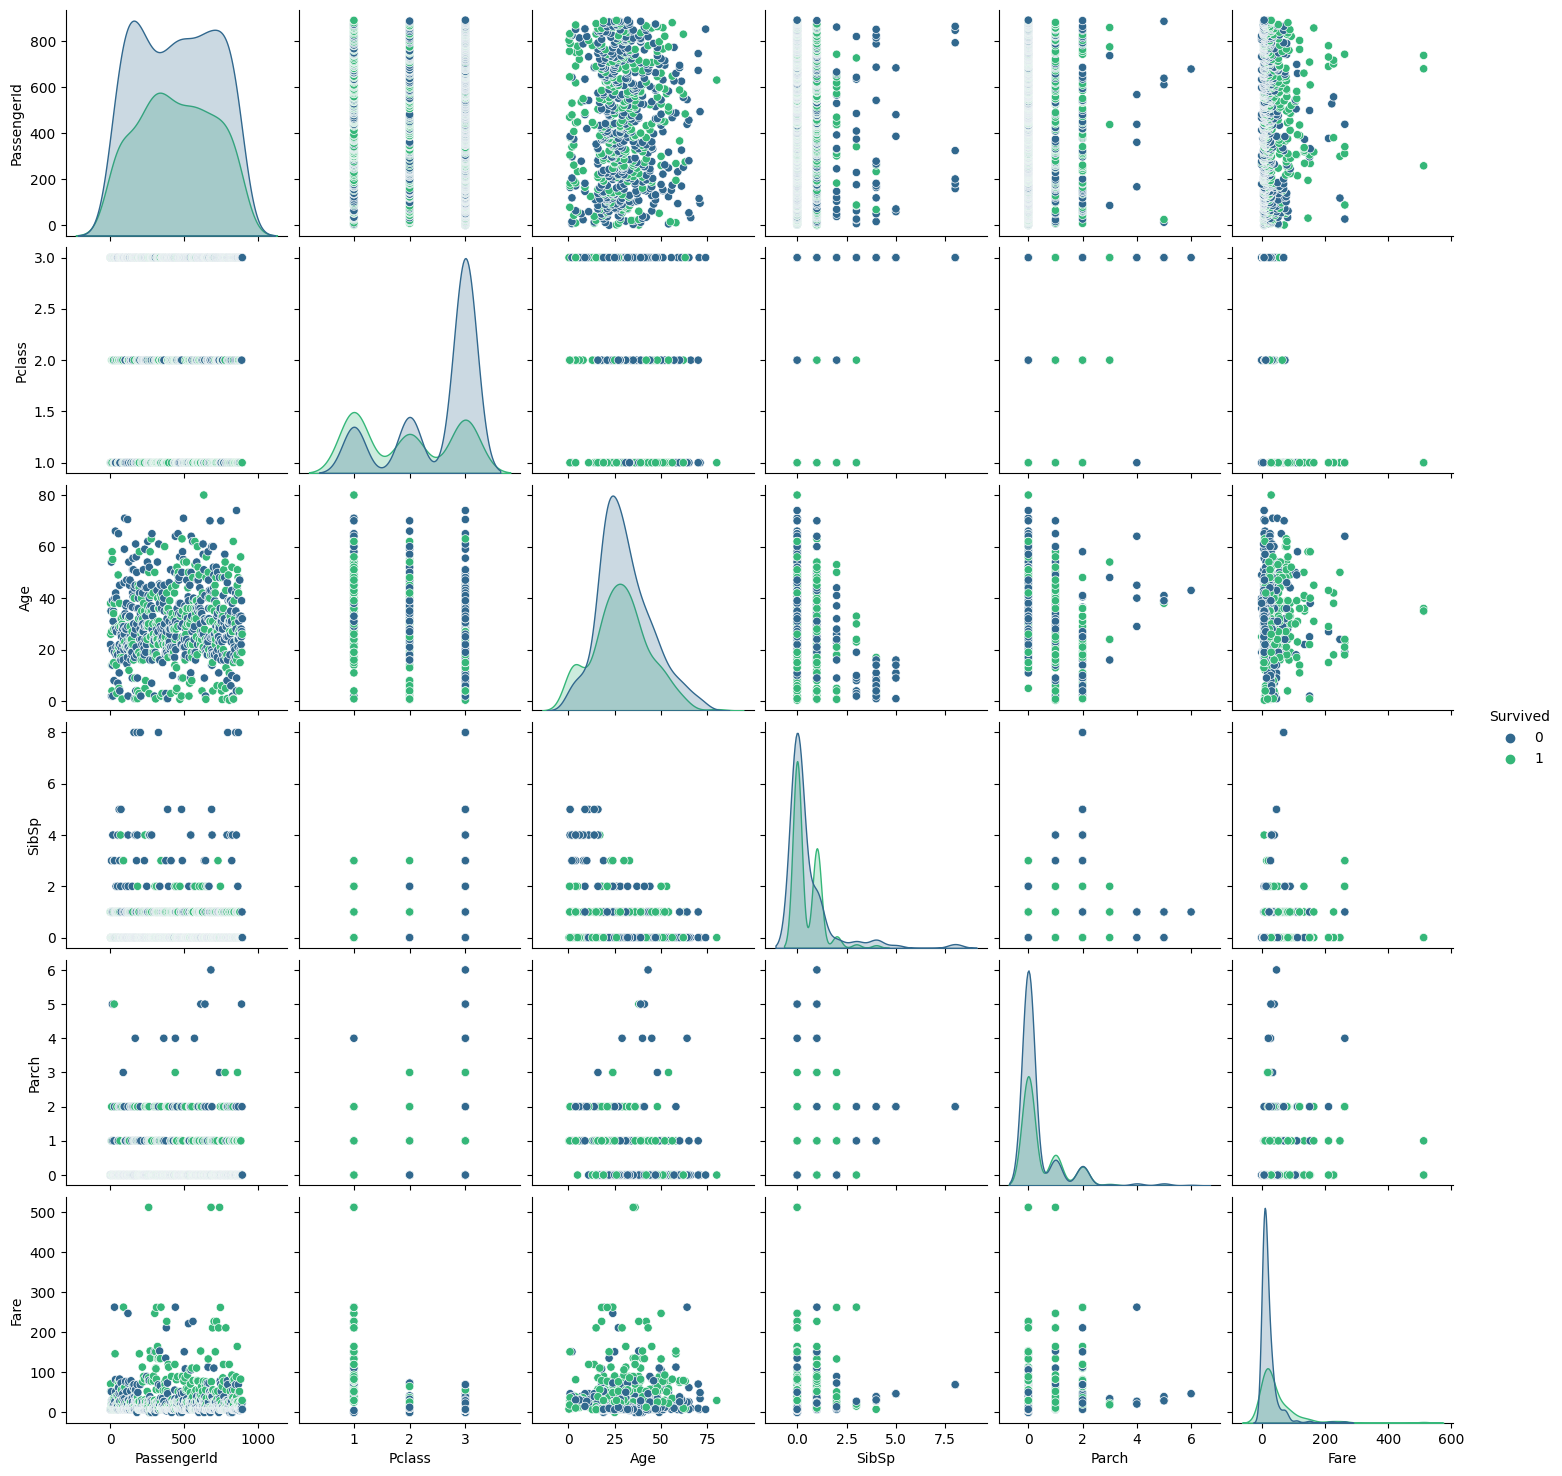

In [4]:
_ = sns.pairplot(data=df, hue="Survived", palette="viridis")

In [5]:
# Number of NaN values
df.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Look at an individual
display(df.loc[[0]])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
#Checking the first-guess theory: All female passangers survived, and all male died
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [8]:
#How many male passangers survived? Let's check
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# Feature Engineering

In [9]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        try: 
            if big_string.find(substring) != -1:
                return substring
        except AttributeError:
            return 'Unknown'
    print(big_string)
    return np.nan

#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
def feature_engineer_titanic(df,title=True,cabin=True,age=True,embarked=True):
    
    if title:
        
        # Identify the following
        title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 
            'Rev','Dr', 'Ms', 'Mlle','Col', 'Capt', 
            'Mme', 'Countess','Don', 'Jonkheer']

        # Find titles in Names
        df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
        
        # Replaces titles by one of Mr, Mrs, Miss 
        df['Title']=df.apply(replace_titles, axis=1)
         
    if cabin:
        
        #Turning cabin number into Deck
        cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
        df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
    
    if age:
        # Q: how many of the ones with Age NaN did survive? 
        # A: 75% did not survive 
        
        # Drop rows for which Age is nan 
        df = df.dropna(subset=['Age'])
        
    if embarked:
        
        #Identify embarked
        embarked_list = ['S', 'C', 'Q', 'Unknown']
        df['Embarked']=df['Embarked'].map(lambda x: substrings_in_string(x, embarked_list))
    
    return df

In [10]:
df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df = feature_engineer_titanic(df,embarked=False)
df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown


# Get rid off irrelevant columns and save the new cvs dataframe 

In [12]:
# Drop columns
try:
    df = df.drop('PassengerId', axis=1)
    df = df.drop('Name', axis=1) 
    df = df.drop('Ticket', axis=1)
    df = df.drop('Cabin', axis=1)
    
    # Could add these with one-hot encoding later
    df = df.drop('Fare', axis=1)
    df = df.drop('Deck', axis=1)
    df = df.drop('Embarked', axis=1) 
    df = df.drop('Title', axis=1) #But basically same info as sex
except KeyError:
    pass

df.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [13]:
df = df.rename(columns={'Survived': 'survived', 'Pclass': 'pclass',
                       'Sex': 'sex', 'Age': 'age',
                       'SibSp': 'sibsp', 'Parch': 'parch', 'Sex_male':'sex_male'})
df.head()

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


# One-hot encoding

https://www.statology.org/one-hot-encoding-in-python/

In [14]:
one_hot_encoded = pd.get_dummies(df['sex'], prefix='sex', drop_first=True)
one_hot_encoded.head()

,sex_male
0,1
1,0
2,0
3,0
4,1


In [15]:
df = pd.concat([df,one_hot_encoded],axis=1)
df.drop(['sex'],axis=1, inplace=True)
df.head()

,survived,pclass,age,sibsp,parch,sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


## Save model

In [16]:
df.to_csv('data/titanic.csv',index=False)  

## Load model

In [17]:
df = pd.read_csv('data/titanic.csv')

print('Keys: ', df.keys())

# More info:
df.head(n=5)

Keys:  Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'sex_male'], dtype='object')


,survived,pclass,age,sibsp,parch,sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


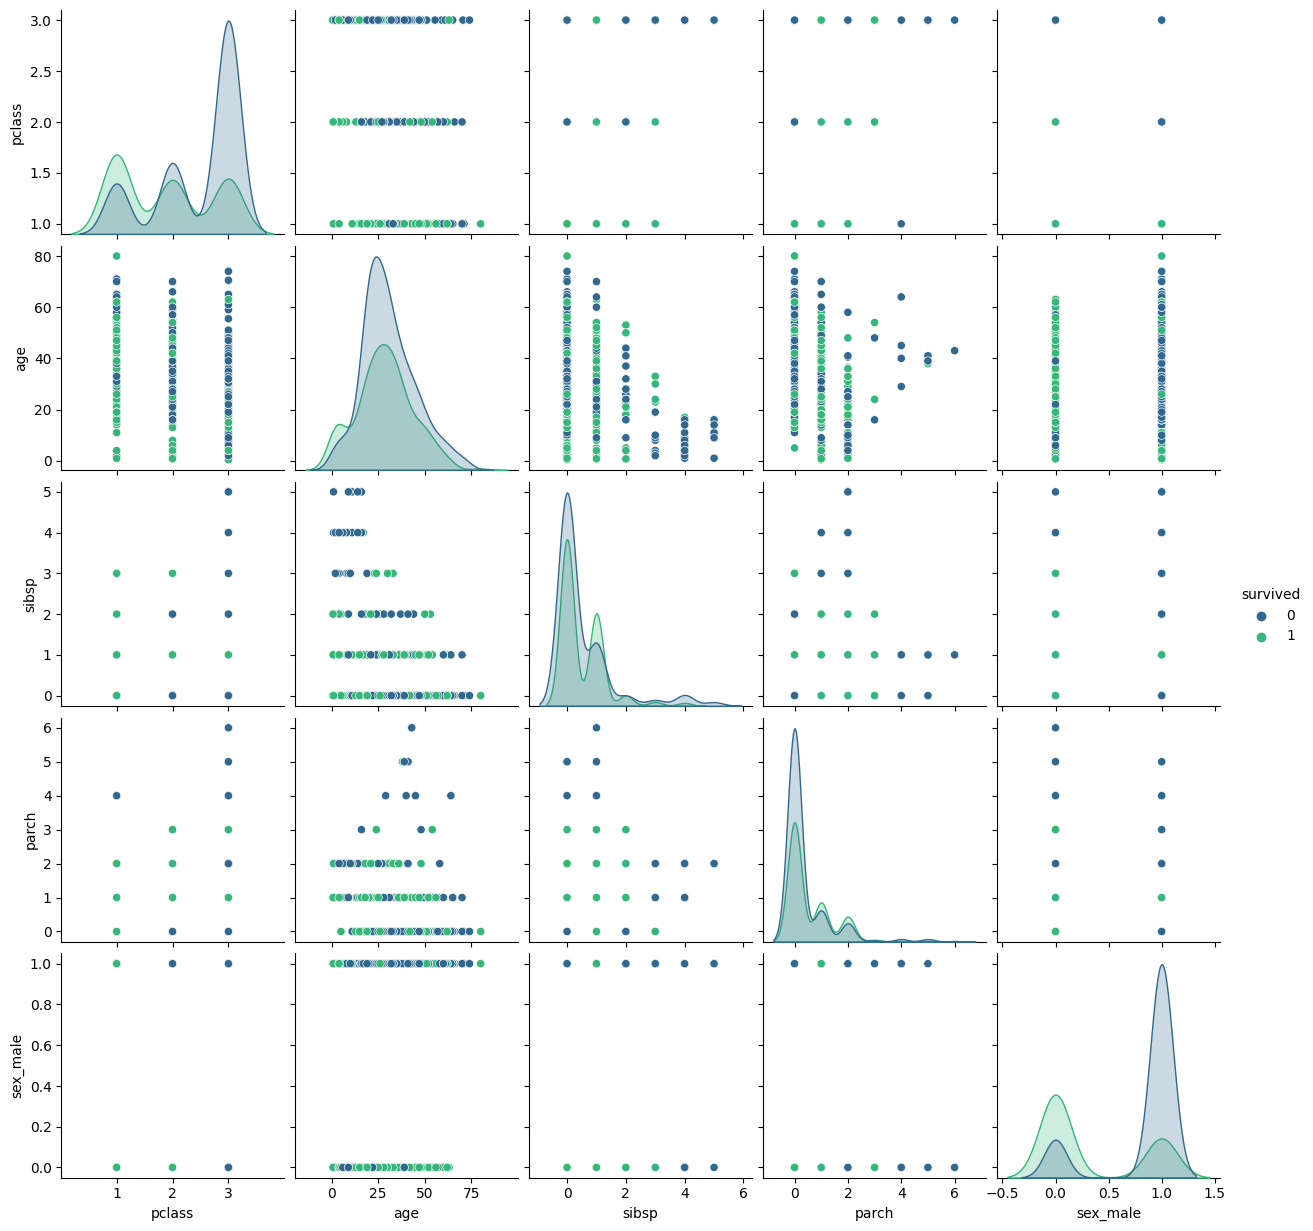

In [18]:
_ = sns.pairplot(data=df, hue="survived", palette="viridis")

# Normalize features

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
print(scaled_features)

[[0.         1.         0.27117366 0.2        0.         1.        ]
 [1.         0.         0.4722292  0.2        0.         0.        ]
 [1.         1.         0.32143755 0.         0.         0.        ]
 ...
 [1.         0.         0.23347575 0.         0.         0.        ]
 [1.         0.         0.32143755 0.         0.         1.        ]
 [0.         1.         0.39683338 0.         0.         1.        ]]


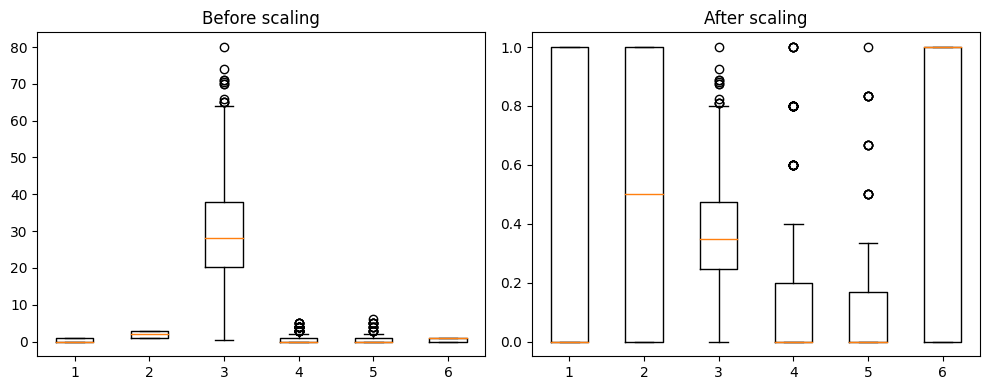

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 4))
plt.subplot(1,2,1)
plt.boxplot(df)
plt.title('Before scaling')
plt.subplot(1,2,2)
plt.boxplot(scaled_features)
plt.title('After scaling')
plt.tight_layout()
plt.show()

In [21]:
df_scaled = pd.DataFrame(scaled_features, columns = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'sex_male'])
df_scaled.to_csv('data/titanic_normalized.csv',index=False)  

# Classification algorithms

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [23]:
def train_and_test(feature_cols,ml_model='LogisticRegression'):

    plt.figure(figsize=(10,5))
    for i,dataframe in enumerate([df,df_scaled]):
    
        # 1. Load data

        # you want all rows, and the feature_cols' columns
        X = np.array(dataframe.loc[:, feature_cols])

        # now we want to create our response vector
        y = dataframe.survived

        # split into training/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # 2. instantiate model
        if ml_model == 'LogisticRegression':
            model = LogisticRegression(solver = 'lbfgs')
        elif ml_model == 'RandomForestClassifier':
            
            model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

        # 3. fit 
        model.fit(X_train, y_train)

        # 4. predict
        predictions = model.predict(X_test)

        # 5. Use score method to get accuracy of model
        score = model.score(X_test, y_test)

        # 6. show confusion matrix
        cm = metrics.confusion_matrix(y_test, predictions)

        plt.subplot(1,2,i+1)
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        if i+1 == 1:
            all_sample_title = 'Accuracy score: {:.4f}'.format(score)
        else:
            all_sample_title = 'Normalized features, accuracy: {:.4f}'.format(score)
        plt.title(all_sample_title, size = 10)
    plt.suptitle(ml_model)

In [24]:
# Pclass: passenger class
# Parch: parents and children
feature_cols = ['pclass']
feature_cols = ['pclass', 'parch', 'age', 'sibSp']
feature_cols = ['sex_male']
feature_cols = ['pclass', 'parch', 'age', 'sibsp', 'sex_male'] #, 'Fare']

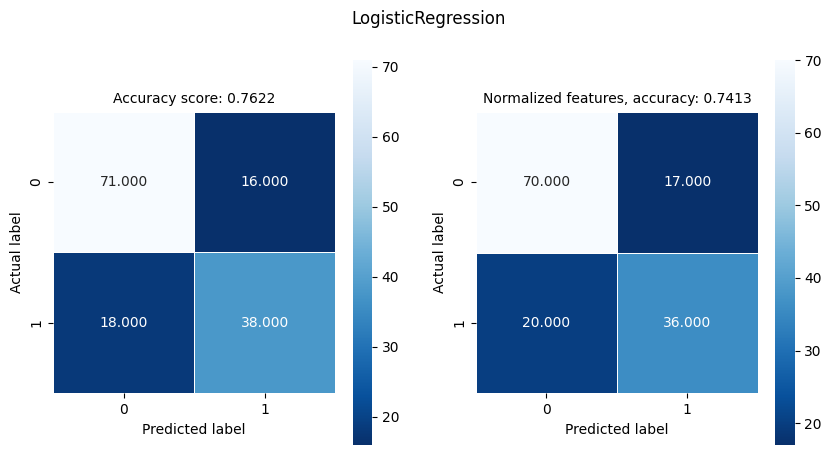

In [25]:
train_and_test(feature_cols,ml_model='LogisticRegression')

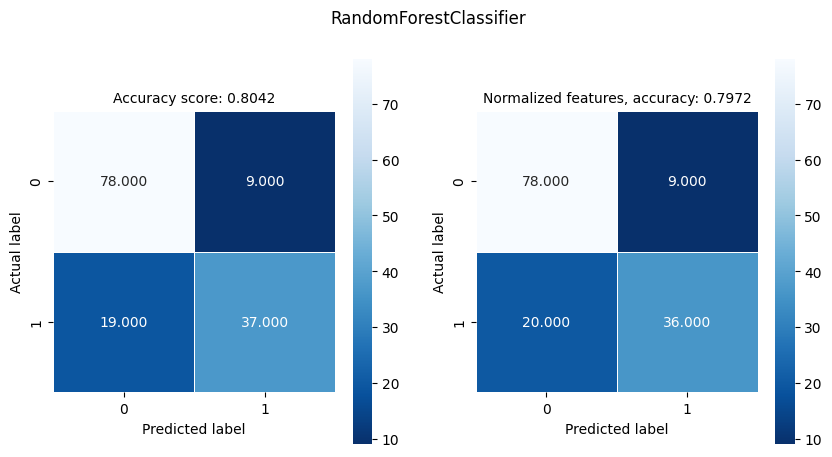

In [26]:
train_and_test(feature_cols,ml_model='RandomForestClassifier')